In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
df = pd.read_csv('../../Dataset/VCB-Historical-Data_Group-9.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df = df[['Date','Price']]

data = df[['Price']]
data = data.dropna()
data = data.reset_index(drop=True) 


In [3]:
df

,Date,Price
0,3/1/2019,47765.0
1,3/4/2019,48226.0
2,3/5/2019,48379.0
3,3/6/2019,48149.0
4,3/7/2019,48456.0
...,...,...
1308,5/27/2024,90200.0
1309,5/28/2024,90700.0
1310,5/29/2024,89800.0
1311,5/30/2024,88600.0


In [4]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 7:3
train_size = int(0.7 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

In [5]:
# 3. Preparing the data

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)

In [6]:
# 4.  Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [7]:
# 5. Predict on test set
y_pred = model.predict(x_test)

In [8]:
# 7. RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = np.mean(np.abs((y_test - y_pred) / y_pred)) * 100
test_mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Percentage Error (MAPE):", test_mape)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)

Mean Absolute Percentage Error (MAPE): 7.14276101227656
Mean Absolute Error (MAE): 5818.512952938235
Root Mean Squared Error (RMSE): 6987.984927529279


In [9]:
# 7.1. Predicted closing prices for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index, last_index+30)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print(last_data)

Predicted closing prices for the next 30 days:
[[85854.62219119]
 [85875.66049649]
 [85896.69880179]
 [85917.7371071 ]
 [85938.7754124 ]
 [85959.8137177 ]
 [85980.852023  ]
 [86001.8903283 ]
 [86022.9286336 ]
 [86043.9669389 ]
 [86065.0052442 ]
 [86086.0435495 ]
 [86107.08185481]
 [86128.12016011]
 [86149.15846541]
 [86170.19677071]
 [86191.23507601]
 [86212.27338131]
 [86233.31168661]
 [86254.34999191]
 [86275.38829722]
 [86296.42660252]
 [86317.46490782]
 [86338.50321312]
 [86359.54151842]
 [86380.57982372]
 [86401.61812902]
 [86422.65643432]
 [86443.69473962]
 [86464.73304493]]
RangeIndex(start=1312, stop=1342, step=1)


In [10]:
# 7.2. Predicted closing prices for the next 60 days
last_index =  data.index[-1]
last_data_60 = pd.RangeIndex(start=last_index+1, stop=last_index+61, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

y_next_60_days = model.predict(x_next_60_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_60_days)

Predicted closing prices for the next 30 days:
[[85875.66049649]
 [85896.69880179]
 [85917.7371071 ]
 [85938.7754124 ]
 [85959.8137177 ]
 [85980.852023  ]
 [86001.8903283 ]
 [86022.9286336 ]
 [86043.9669389 ]
 [86065.0052442 ]
 [86086.0435495 ]
 [86107.08185481]
 [86128.12016011]
 [86149.15846541]
 [86170.19677071]
 [86191.23507601]
 [86212.27338131]
 [86233.31168661]
 [86254.34999191]
 [86275.38829722]
 [86296.42660252]
 [86317.46490782]
 [86338.50321312]
 [86359.54151842]
 [86380.57982372]
 [86401.61812902]
 [86422.65643432]
 [86443.69473962]
 [86464.73304493]
 [86485.77135023]
 [86506.80965553]
 [86527.84796083]
 [86548.88626613]
 [86569.92457143]
 [86590.96287673]
 [86612.00118203]
 [86633.03948733]
 [86654.07779264]
 [86675.11609794]
 [86696.15440324]
 [86717.19270854]
 [86738.23101384]
 [86759.26931914]
 [86780.30762444]
 [86801.34592974]
 [86822.38423504]
 [86843.42254035]
 [86864.46084565]
 [86885.49915095]
 [86906.53745625]
 [86927.57576155]
 [86948.61406685]
 [86969.65237215]

In [11]:
# 7.3. Predicted closing prices for the next 90 days
last_index =  data.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index, last_index+90)).reshape(-1, 1)

y_next_90_days = model.predict(x_next_90_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[[85854.62219119]
 [85875.66049649]
 [85896.69880179]
 [85917.7371071 ]
 [85938.7754124 ]
 [85959.8137177 ]
 [85980.852023  ]
 [86001.8903283 ]
 [86022.9286336 ]
 [86043.9669389 ]
 [86065.0052442 ]
 [86086.0435495 ]
 [86107.08185481]
 [86128.12016011]
 [86149.15846541]
 [86170.19677071]
 [86191.23507601]
 [86212.27338131]
 [86233.31168661]
 [86254.34999191]
 [86275.38829722]
 [86296.42660252]
 [86317.46490782]
 [86338.50321312]
 [86359.54151842]
 [86380.57982372]
 [86401.61812902]
 [86422.65643432]
 [86443.69473962]
 [86464.73304493]
 [86485.77135023]
 [86506.80965553]
 [86527.84796083]
 [86548.88626613]
 [86569.92457143]
 [86590.96287673]
 [86612.00118203]
 [86633.03948733]
 [86654.07779264]
 [86675.11609794]
 [86696.15440324]
 [86717.19270854]
 [86738.23101384]
 [86759.26931914]
 [86780.30762444]
 [86801.34592974]
 [86822.38423504]
 [86843.42254035]
 [86864.46084565]
 [86885.49915095]
 [86906.53745625]
 [86927.57576155]
 [86948.61406685]

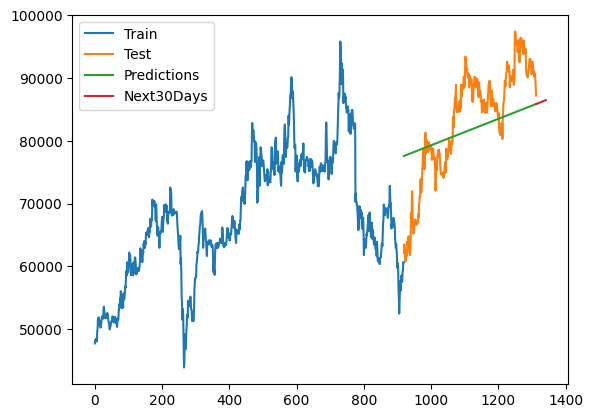

In [12]:
# 8.1. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

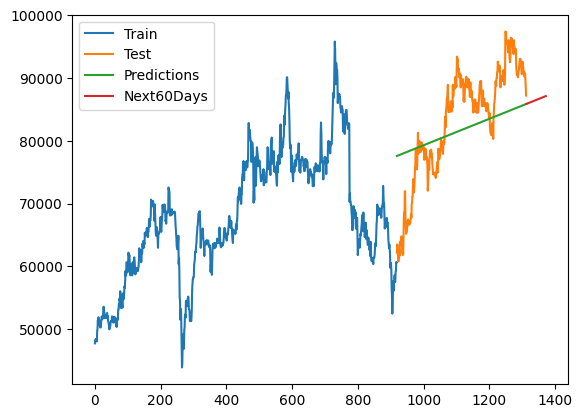

In [13]:
# 8.2. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Days'])
plt.show()

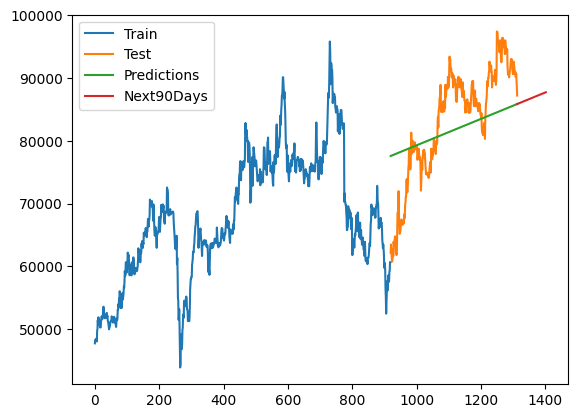

In [14]:
# 8.3. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Days'])
plt.show()